In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

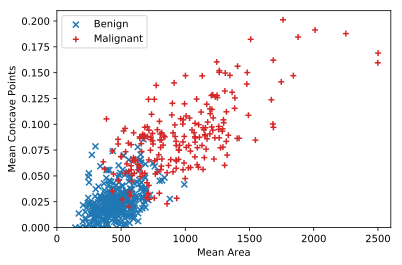

In [2]:
import numpy as np
import sklearn.datasets
dat = sklearn.datasets.load_breast_cancer()

ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

def plot_cells():    
    plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend(['Benign', 'Malignant'])
plot_cells()

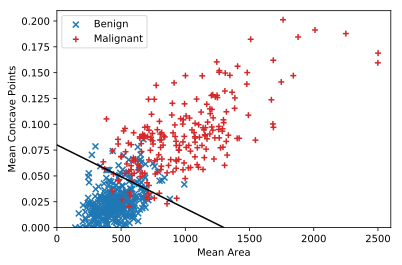

In [3]:
plot_cells()
plt.plot([0, 1300], [0.08,0], 'k-')

### Zero-One Losses

Text(0.5, 0, '$h_θ(x) \\cdot y$')

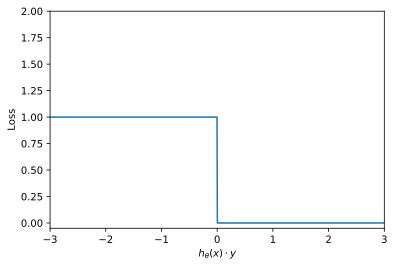

In [4]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0))
plt.xlim([-3,3])
plt.ylim([-0.05, 2])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")

### Alternative Losses 

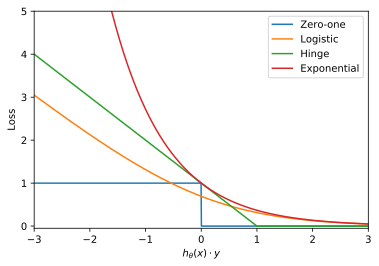

In [5]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0))
plt.plot(hy, np.log(1+np.exp(-hy)))  #Logistic loss
plt.plot(hy, np.maximum(1 - hy, 0))  #Hinge loss
plt.plot(hy, np.exp(-hy)) #Exponential Losses
plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Zero-one', 'Logistic', 'Hinge', 'Exponential'])

### Support Vector Machines

Text(0.5, 0, '$h_θ(x) \\cdot y$')

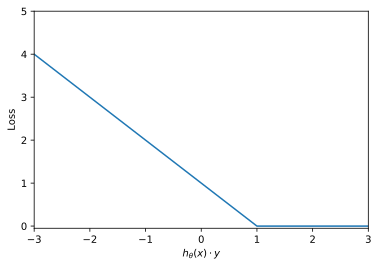

In [6]:
hy = np.linspace(-3,3,1000)
plt.plot(hy, np.maximum(1 - hy, 0))
plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")

In [8]:
#Calculating error and loss
def svm_gd(X, y, alpha, iters, lam):
    m,n = X.shape
    theta = np.zeros(n)
    YX = X * y[:,None]
    loss, err = np.zeros(iters), np.zeros(iters)
    for t in range(iters):
        hy = YX @ theta
        loss[t] = np.maximum(1-hy,0).mean()
        err[t] = (hy <= 0).mean()
        theta -= alpha * (-YX.T @ (YX @ theta <= 1)/m + 2*lam*theta)
    return theta, loss, err

In [9]:
def normalize_data(X, normalize_cols):
    """ Normalize specified columns of X to range [0,1] in place. """
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    return min_X, max_X

def unnormalize_theta(theta, normalize_cols, ranges):
    theta[normalize_cols] /= (ranges[1] - ranges[0])
    theta[-1] -= theta[normalize_cols] @ ranges[0]
    return theta

In [10]:
# build the data and run the SVM
X0 = np.asarray([dat["data"][:,ix], dat["data"][:,iy], np.ones(dat["data"].shape[0])]).T
y0 = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

X, y = X0.copy(), y0.copy()
ranges = normalize_data(X, [True, True, False])
theta, loss, err = svm_gd(X,y, 1.0, 1000, 1e-3)
unnormalize_theta(theta, [True, True, False], ranges)
print(theta)

[ 1.67393642e-03  2.95613635e+01 -2.80709431e+00]


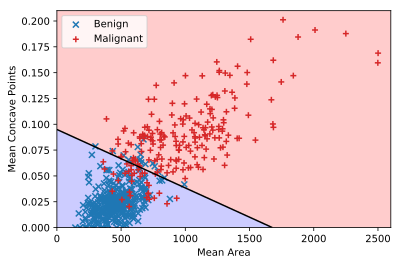

In [11]:
def plot_classification(theta):
    x_range = [0,2600]
    y_range = [0, 0.21]

    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy), np.ones(xx.size)]).T
    zz = (X_ @ theta).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-100.0,0,100.0],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    s2 = plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2], ['Benign', 'Malignant'])
plot_classification(theta)

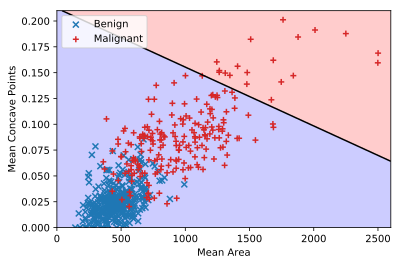

In [12]:
#the classifier after 10 iterations of gradient descent
plot_classification(unnormalize_theta(svm_gd(X,y, 1.0, 10, 1e-3)[0], [True, True, False], ranges))

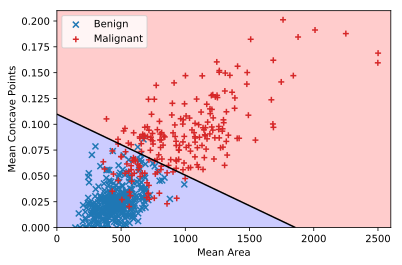

In [13]:
#After 50 Iterations
plot_classification(unnormalize_theta(svm_gd(X,y, 1.0, 50, 1e-3)[0], [True, True, False], ranges))

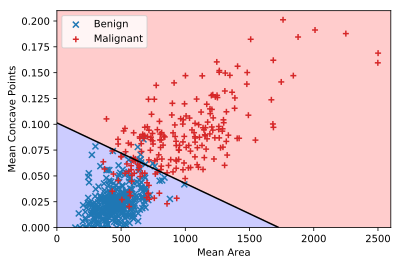

In [14]:
#100 Iteration
plot_classification(unnormalize_theta(svm_gd(X,y, 1.0, 100, 1e-3)[0], [True, True, False], ranges))

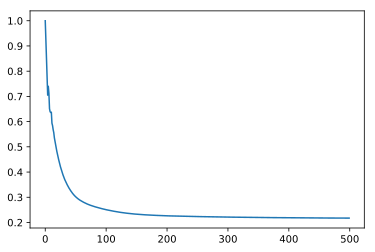

In [15]:
theta, loss, err = svm_gd(X,y, 1.0, 500, 1e-3)
plt.plot(loss)

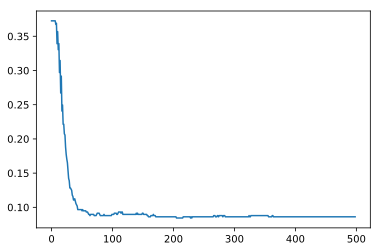

In [16]:
plt.plot(err[1:]) # err[0] is always 1.0, so we only look at 